## AccelerateAI - Global Bootcamp

#### Tree Based Models

In this notebook we train ensemble models to predict handwritten digits.

In [3]:
#Load required libraries
import pandas as pd

import matplotlib.pyplot as plt  #Graphics
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score

In [4]:
#Read the data
digits_df = pd.read_csv("DT_digit_Classification_MNIST.csv")
digits_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Show a matrix as an image
def print_image(row, df):
    temp=df.iloc[row,:].values
    temp = temp.reshape(28,28).astype('uint8')
    plt.imshow(temp)                            

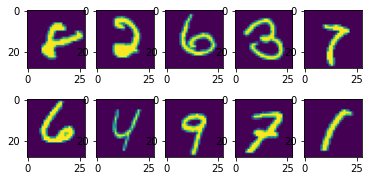

In [16]:
# How does the digits look like?
test = digits_df.sample(10)
test.drop(columns=['label'], inplace=True)

#Plot the pixl
plt.figure(figsize=(6,3))
for i in range(10):
    plt.subplot(2,5, i+1)
    print_image(i, test)

In [18]:
#Split the dataset

df_x = digits_df.drop(columns=['label'])
df_y = digits_df['label']

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)
print("Train Data:", X_train.shape)
print("Test Data:", X_test.shape)

Train Data: (33600, 784)
Test Data: (8400, 784)


In [19]:
#training random Forest
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [20]:
pred = clf.predict(X_test)

print ("Classification Report")
print(classification_report(y_test, pred))

print ("Confusion Report")
print(confusion_matrix(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       813
           1       0.98      0.98      0.98       961
           2       0.96      0.97      0.97       860
           3       0.96      0.95      0.95       863
           4       0.96      0.96      0.96       827
           5       0.96      0.97      0.96       756
           6       0.97      0.98      0.98       841
           7       0.97      0.96      0.96       899
           8       0.95      0.94      0.94       768
           9       0.95      0.94      0.95       812

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400

Confusion Report
[[793   0   1   1   2   1   6   0   9   0]
 [  0 946   7   1   2   2   1   0   2   0]
 [  2   1 834   4   3   1   4   6   5   0]
 [  2   0  11 817   1   9   1   7  10   5]
 [  2   2   0   0 798   1   4 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

names = ["Decision Tree", 
         "Random Forest", 
         "AdaBoost", 
         "GB", 
         "HistGB"
        ]

classifiers = [
    DecisionTreeClassifier(max_depth=20),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    AdaBoostClassifier(n_estimators=50),
    GradientBoostingClassifier(max_depth=5, n_estimators=20),
    HistGradientBoostingClassifier(max_depth=5, l2_regularization=True)
]

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    trainscore = clf.score(X_train, y_train)
    testscore = clf.score(X_test, y_test)
    print(name, trainscore.round(3), testscore.round(3))

Decision Tree 0.995 0.854
Random Forest 0.866 0.867
AdaBoost 0.74 0.738
